<a href="https://colab.research.google.com/github/Nazmul92/Machine-learning-/blob/main/Performance_evaluation_of_MLP_and_CNN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [1]:
import torch as th
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler

# Device setting (GPU or CPU)

In [2]:
train_gpu = th.cuda.is_available()
if not train_gpu:
  print('cuda is not available')
else:
  print('cuda is available')

cuda is available


# Load MNIST dataset

In [ ]:
batch_size = 100
valid_size = 0.2
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data',train=True,download=True,
                            transform=transform)

test_data = datasets.MNIST(root='data', train=False, download=True,
                           transform=transform)

# Split training set into training and validation

In [4]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

split = int(np.floor(valid_size*num_train))                            ## split 20% training data as a validation set
train_idx, valid_idx = indices[split:], indices[:split]

trainSampler = SubsetRandomSampler(train_idx)
validSampler = SubsetRandomSampler(valid_idx)

train_loader = th.utils.data.DataLoader(train_data,batch_size=batch_size,             ## dataload for training
                                        sampler=trainSampler,num_workers=0)

valid_loader = th.utils.data.DataLoader(train_data,batch_size=batch_size,             ## dataload for validation
                                       sampler=validSampler, num_workers=0)

test_loader = th.utils.data.DataLoader(test_data,batch_size=batch_size, num_workers=0)    ## dataload for testing set

In [ ]:
len(train_loader)                     ## check train loader length

480

In [ ]:
sample = next(iter(train_loader))              ## make sample iterator

In [ ]:
len(sample)                                    ## length of each sample ( image and label)

2

In [ ]:
image, label = sample                          ## unsequence of sample into image and label

In [ ]:
image.shape                                    ## check image shape

torch.Size([100, 1, 28, 28])

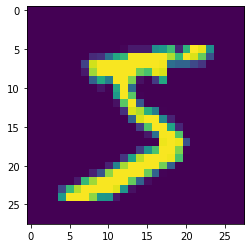

In [ ]:
plt.imshow(image[0].squeeze())                 ## plot a single image

# Ploting a multiple samples

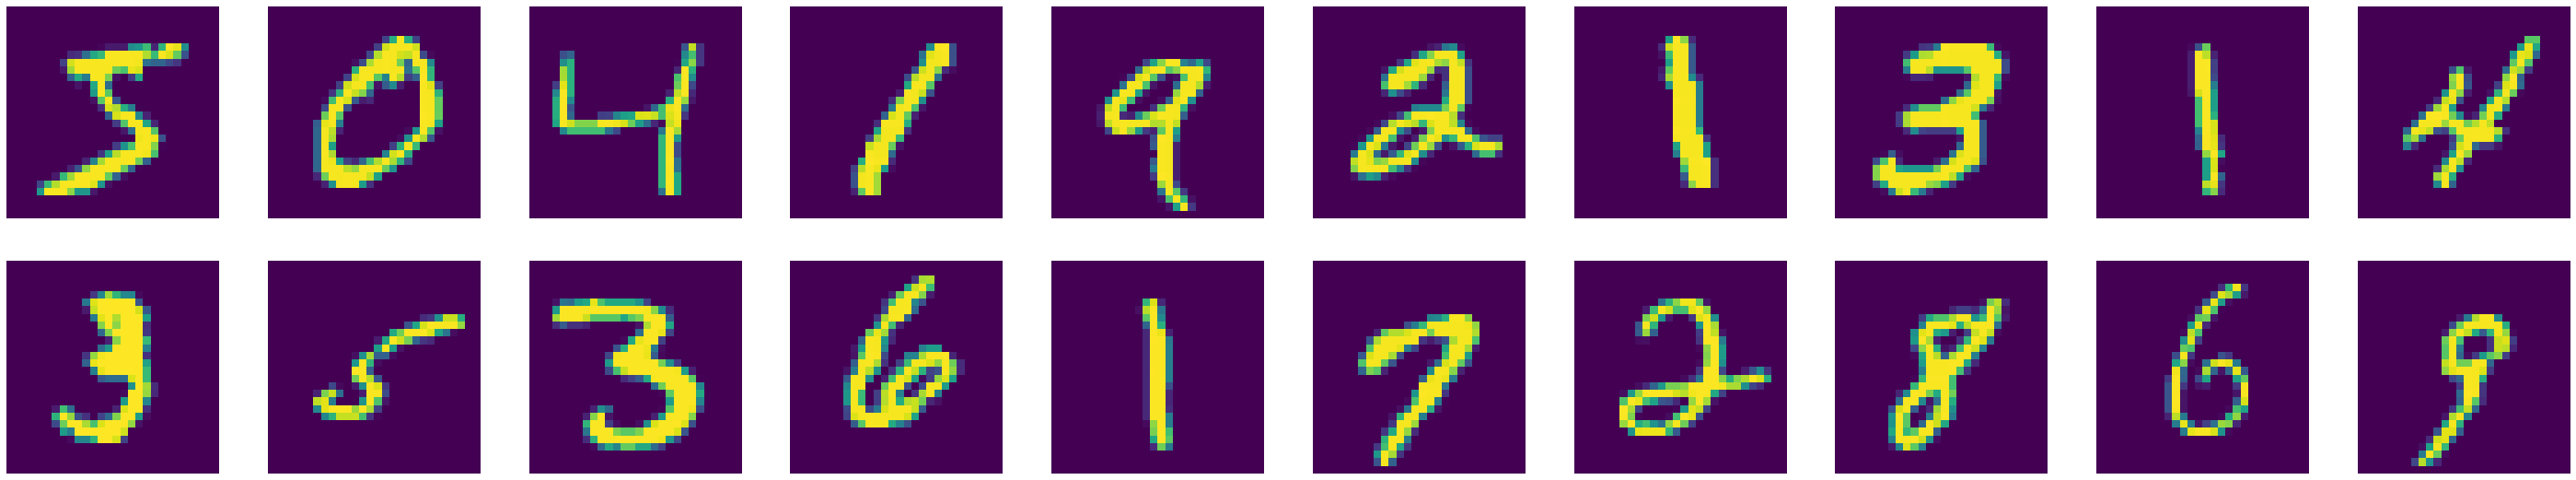

In [5]:
train_loader_img = th.utils.data.DataLoader(train_data,batch_size=1,num_workers=0)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader_img, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28))
    plt.axis('off')
    if (i >= 20): break
plt.show()

# Define multi-layer perceptron (MLP)

In [10]:
class Net(nn.Module):                                       
  def __init__(self) -> None:
     super().__init__()
     h_layer1 = 512
     h_layer2 = 512
     self.fc1 = nn.Linear(28*28, h_layer1)
     self.fc2 = nn.Linear(h_layer1,h_layer2)
     self.fc3 = nn.Linear(h_layer2,10)
     self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x

# MLP model instance

In [11]:
model = Net()
criterion = CrossEntropyLoss()                                         ## define loss for multiclass classification
opt = th.optim.SGD(params=model.parameters(), lr=0.1)                  ## define optimizer with learning rate 

# MLP model training and save the best model

In [12]:
_train_loss = []
_valid_loss = []
valid_loss_min = np.Inf
epoch = 30

for epoch in range(epoch):                        ## loop for epoch
  train_loss = 0.0
  valid_loss = 0.0

  for image, label in train_loader:                  ## loop for batch (train loader)
    opt.zero_grad()
    pred = model(image)
    loss = criterion(pred,label)
    loss.backward()
    opt.step()
    train_loss+=loss.item()*image.size(0)
 
  for image, label in valid_loader:                  ## loop for valid loader
    pred = model(image)
    loss = criterion(pred,label)
    valid_loss+=loss.item()*image.size(0)

  train_loss = train_loss / len(train_loader.dataset)                ## loss calculation of each epoch
  valid_loss = valid_loss / len(valid_loader.dataset)
  _train_loss.append(train_loss)
  _valid_loss.append(valid_loss)
  print('Epoch: {} \ttrain_loss: {:.6f} \tvalid_loss: {:.6f}'.format(epoch+1,train_loss,valid_loss))

  if valid_loss<=valid_loss_min:                                 ## save model (best model) when validation loss starts increasing
    th.save(model.state_dict(), 'model.pt')
    print('Epoch: {}'.format(epoch))
    valid_loss_min = valid_loss

Epoch: 1 	train_loss: 0.537830 	valid_loss: 0.065212
Epoch: 0
Epoch: 2 	train_loss: 0.213253 	valid_loss: 0.045606
Epoch: 1
Epoch: 3 	train_loss: 0.153779 	valid_loss: 0.036267
Epoch: 2
Epoch: 4 	train_loss: 0.121020 	valid_loss: 0.030336
Epoch: 3
Epoch: 5 	train_loss: 0.099356 	valid_loss: 0.026525
Epoch: 4
Epoch: 6 	train_loss: 0.082828 	valid_loss: 0.024592
Epoch: 5
Epoch: 7 	train_loss: 0.071156 	valid_loss: 0.022628
Epoch: 6
Epoch: 8 	train_loss: 0.062840 	valid_loss: 0.020378
Epoch: 7
Epoch: 9 	train_loss: 0.056269 	valid_loss: 0.020471
Epoch: 10 	train_loss: 0.049150 	valid_loss: 0.019593
Epoch: 9
Epoch: 11 	train_loss: 0.046001 	valid_loss: 0.018715
Epoch: 10
Epoch: 12 	train_loss: 0.040009 	valid_loss: 0.018890
Epoch: 13 	train_loss: 0.036012 	valid_loss: 0.018336
Epoch: 12
Epoch: 14 	train_loss: 0.033892 	valid_loss: 0.017329
Epoch: 13
Epoch: 15 	train_loss: 0.029859 	valid_loss: 0.017225
Epoch: 14
Epoch: 16 	train_loss: 0.028183 	valid_loss: 0.018460
Epoch: 17 	train_loss: 0

# Plotting training loss and validation loss (MLP)

Text(0, 0.5, 'Loss')

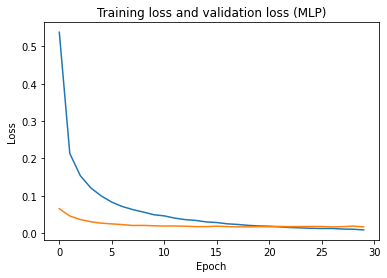

In [13]:
plt.plot(_train_loss)
plt.plot(_valid_loss)
plt.title('Training loss and validation loss (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# MLP model testing

In [14]:
model.load_state_dict(th.load('model.pt'))                    ## model load

test_loss = 0.0
class_correct = list(0. for i in range(10))                   ## initialize lists to monitor test loss and accuracy
class_total = list(0. for i in range(10))

model.eval()                                                  ## prep model for evaluation

for data, target in test_loader:                              ## loop for batch
    output = model(data)
    loss = criterion(output, target)                          ## calculate the loss
    test_loss += loss.item()*data.size(0)                     ## calculate cumulative loss
    _, pred = th.max(output, 1)                               ## convert output probabilities to predicted class
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))  ## compare predictions to true label
    

    for i in range(batch_size):                               ## calculate test accuracy for each object class
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_loader.dataset)               ## calculate and print avg test loss
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)')

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.060350

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1129/1135)
Test Accuracy of     2: 98% (1016/1032)
Test Accuracy of     3: 98% (993/1010)
Test Accuracy of     4: 98% (964/982)
Test Accuracy of     5: 97% (874/892)
Test Accuracy of     6: 97% (937/958)
Test Accuracy of     7: 97% (998/1028)
Test Accuracy of     8: 97% (954/974)
Test Accuracy of     9: 96% (978/1009)

Test Accuracy (Overall): 98% (9813/10000)


# CNN for classification

In [15]:
## model class (inherit nn class)
class Net(nn.Module):
  def __init__(self) -> None:
     super().__init__()
     self.conv1 = nn.Conv2d(1,16,5, padding = 2)                 ## input channel 1 (gray image), output channel 16, filter size 5
     self.conv2 = nn.Conv2d(16,32,5,padding=2)                   ## input channel 16 (previous leayer output), output channel 32, filter size 5
     self.pool = nn.MaxPool2d(2,2)                               ## Pooling size 2, and stride 2
     self.fc1 = nn.Linear(32*7*7, 500)                           ## 32x7x7 (flatten input), 500 (output neuron)
     self.fc2 = nn.Linear(500,10)                                ## 500 (input neuron from previous fully connected layer), 10 for 10 classes
     self.dropout = nn.Dropout(0.2)                              ## 0.2 for 20% dropout to reduce overfitting
  
  def forward(self,x):                                           ## define forward pass
    x = self.pool(F.relu(self.conv1(x)))                         ## calling first conv layer, passing the output to relu activation function, finally passing to pooling layer
    x = self.pool(F.relu(self.conv2(x)))                         ## same for second conv layer
    x = x.view(-1, 32*7*7)                                       ## flatten the output from last conv layer
    x = self.dropout(x)                                          ## calling dropout layer
    x = F.relu(self.fc1(x))                                      ## calling first fully-connected layer
    x = self.dropout(x)
    x = self.fc2(x)
    return x

model = Net()                                      ## create a object of model class
print(model)

if train_gpu:                                      ## model set to gpu if train on cuda
  model.cuda

criterion = CrossEntropyLoss()                                 ## define loss function for multiclass classification
opt = th.optim.SGD(params=model.parameters(), lr=0.1)          ## define optimizer (Stochastic gradient descent) with learning rate 0.1

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


# Model training and calculating training loss and validation loss

In [16]:
from torch.optim import Optimizer
_train_loss = []                                  ## define empty list to store train loss
_valid_loss = []
valid_loss_min = np.Inf                           ## define valid loss minimum is infinity

for epoch in range(30):                           ## loop for epoch
  train_loss = 0.0
  valid_loss = 0.0

  for image, label in train_loader:               ## loop for batch iteration
    opt.zero_grad()                               ## set optimizer is zero
    pred = model(image)                           ## model prediction
    loss = criterion(pred,label)                  ## loss calculation
    loss.backward()                               ## backward pass
    opt.step()                                    ## weight update
    train_loss+=loss.item()*image.size(0)         ## calculate cumulative training loss
 
  for image, label in valid_loader:               ## loop for valid loss 
    pred = model(image)
    loss = criterion(pred,label)
    valid_loss+=loss.item()*image.size(0)

  train_loss = train_loss / len(train_loader.dataset)      ## loss after each epoch
  valid_loss = valid_loss / len(valid_loader.dataset)
  _train_loss.append(train_loss)
  _valid_loss.append(valid_loss)
  print('Epoch: {} \ttrain_loss: {:.6f} \tvalid_loss: {:.6f}'.format(epoch+1,train_loss,valid_loss))

  if valid_loss<=valid_loss_min:                         ## save model when validation loss starts incresing
    th.save(model.state_dict(), 'model.pt')
    print('Epoch: {}'.format(epoch))
    valid_loss_min = valid_loss

Epoch: 1 	train_loss: 0.347798 	valid_loss: 0.023480
Epoch: 0
Epoch: 2 	train_loss: 0.080361 	valid_loss: 0.016258
Epoch: 1
Epoch: 3 	train_loss: 0.059811 	valid_loss: 0.013581
Epoch: 2
Epoch: 4 	train_loss: 0.046289 	valid_loss: 0.014139
Epoch: 5 	train_loss: 0.039670 	valid_loss: 0.012247
Epoch: 4
Epoch: 6 	train_loss: 0.033078 	valid_loss: 0.012299
Epoch: 7 	train_loss: 0.030671 	valid_loss: 0.011269
Epoch: 6
Epoch: 8 	train_loss: 0.025633 	valid_loss: 0.010216
Epoch: 7
Epoch: 9 	train_loss: 0.023946 	valid_loss: 0.010187
Epoch: 8
Epoch: 10 	train_loss: 0.021452 	valid_loss: 0.011338
Epoch: 11 	train_loss: 0.020103 	valid_loss: 0.010505
Epoch: 12 	train_loss: 0.017749 	valid_loss: 0.009770
Epoch: 11
Epoch: 13 	train_loss: 0.016363 	valid_loss: 0.008798
Epoch: 12
Epoch: 14 	train_loss: 0.014526 	valid_loss: 0.008361
Epoch: 13
Epoch: 15 	train_loss: 0.015035 	valid_loss: 0.009811
Epoch: 16 	train_loss: 0.014832 	valid_loss: 0.010171
Epoch: 17 	train_loss: 0.013327 	valid_loss: 0.00855

# Plotting training loss and validation loss

Text(0, 0.5, 'Loss')

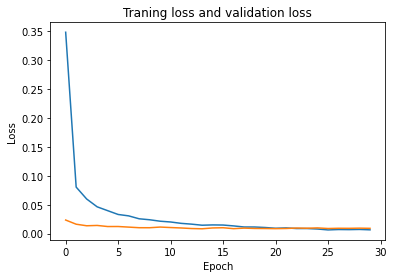

In [17]:
plt.plot(_train_loss)
plt.plot(_valid_loss)
plt.title('Traning loss and validation loss')
plt.xlabel('Epoch')
plt.ylabel("Loss")

# Model testing (CNN)

In [18]:
model.load_state_dict(th.load('model.pt'))

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() 

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = th.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    

    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)')

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.023853

Test Accuracy of     0: 99% (976/980)
Test Accuracy of     1: 99% (1132/1135)
Test Accuracy of     2: 99% (1026/1032)
Test Accuracy of     3: 99% (1003/1010)
Test Accuracy of     4: 98% (968/982)
Test Accuracy of     5: 99% (884/892)
Test Accuracy of     6: 98% (948/958)
Test Accuracy of     7: 98% (1017/1028)
Test Accuracy of     8: 99% (965/974)
Test Accuracy of     9: 99% (999/1009)

Test Accuracy (Overall): 99% (9918/10000)
